# Train model on 80 MFCCs features

### Buzz 1

#### load data

In [1]:
import numpy as np

# Load training data
Noneswarming_train_mfccs_buzz_1 = np.load("Train_buzz_1_mfccs/Noneswarming_train.npy")
Swarming_train_mfccs_buzz_1 = np.load("Train_buzz_1_mfccs/Swarming_train.npy")

# Load test data
Noneswarming_test_mfccs_buzz_1 = np.load("Test_buzz_1_mfccs/Noneswarming_test.npy")
Swarming_test_mfccs_buzz_1 = np.load("Test_buzz_1_mfccs/Swarming_test.npy")

# Load validation data
Noneswarming_val_mfccs_buzz_1 = np.load("Val_buzz_1_mfccs/Noneswarming_val.npy")
Swarming_val_mfccs_buzz_1 = np.load("Val_buzz_1_mfccs/Swarming_val.npy")




In [2]:
train_data_buzz_1 = np.vstack([Noneswarming_train_mfccs_buzz_1, Swarming_train_mfccs_buzz_1])
train_labels_buzz_1 = np.array([0] * Noneswarming_train_mfccs_buzz_1.shape[0] + [1] * Swarming_train_mfccs_buzz_1.shape[0])

val_data_buzz_1 = np.vstack([Noneswarming_val_mfccs_buzz_1, Swarming_val_mfccs_buzz_1])
val_labels_buzz_1 = np.array([0] * Noneswarming_val_mfccs_buzz_1.shape[0] + [1] * Swarming_val_mfccs_buzz_1.shape[0])

test_data_buzz_1 = np.vstack([Noneswarming_test_mfccs_buzz_1, Swarming_test_mfccs_buzz_1])
test_labels_buzz_1 = np.array([0] * Noneswarming_test_mfccs_buzz_1.shape[0] + [1] * Swarming_test_mfccs_buzz_1.shape[0])

In [3]:
print("Train Data Shape:", train_data_buzz_1.shape)
print("Train Labels Shape:", train_labels_buzz_1.shape)

print("Validation Data Shape:", val_data_buzz_1.shape)
print("Validation Labels Shape:", val_labels_buzz_1.shape)

print("Test Data Shape:", test_data_buzz_1.shape)
print("Test Labels Shape:", test_labels_buzz_1.shape)


Train Data Shape: (23384, 80)
Train Labels Shape: (23384,)
Validation Data Shape: (5641, 80)
Validation Labels Shape: (5641,)
Test Data Shape: (12773, 80)
Test Labels Shape: (12773,)


# 1DCNN

In [4]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

model = keras.Sequential([
    keras.layers.Conv1D(64, 3, activation='relu', input_shape=(80, 1)),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(128, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(256, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data_buzz_1 ,train_labels_buzz_1, epochs=10, batch_size=32, validation_data=(val_data_buzz_1,val_labels_buzz_1))
model.summary()

Epoch 1/10
731/731 [==============================] - 13s 16ms/step - loss: 0.0101 - accuracy: 0.9958 - val_loss: 0.0023 - val_accuracy: 0.9995
Epoch 2/10
731/731 [==============================] - 11s 16ms/step - loss: 1.4747e-07 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 3/10
731/731 [==============================] - 11s 15ms/step - loss: 2.0302e-07 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 0.9996
Epoch 4/10
731/731 [==============================] - 10s 13ms/step - loss: 9.8215e-08 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9996
Epoch 5/10
731/731 [==============================] - 10s 13ms/step - loss: 5.9665e-08 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 0.9995
Epoch 6/10
731/731 [==============================] - 10s 14ms/step - loss: 4.4611e-08 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9996
Epoch 7/10
731/731 [==============================] - 10s 13ms/step - loss: 3.5243e-08 - accuracy: 1.0000 - val_loss

In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data_buzz_1 , test_labels_buzz_1)

print(f'Test accuracy: {test_acc}')

400/400 [==============================] - 1s 4ms/step - loss: 0.4058 - accuracy: 0.9757
Test accuracy: 0.975651741027832


# Confusion matrix of 1DCNN on buzz 1

400/400 [==============================] - 1s 4ms/step


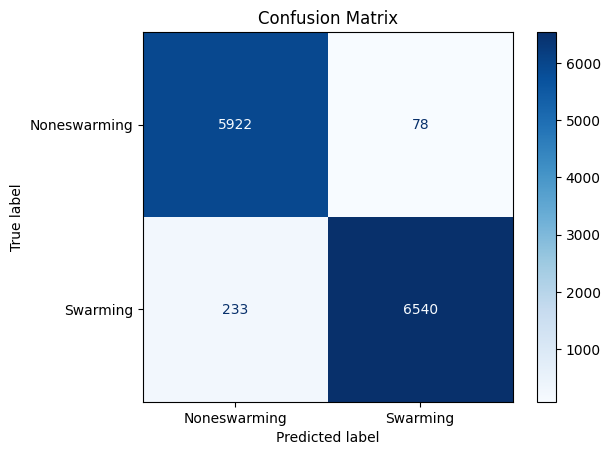

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(test_data_buzz_1)
rounded_predictions = np.round(predictions)

# Calculate confusion matrix
cm = confusion_matrix(test_labels_buzz_1, rounded_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Noneswarming", "Swarming"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# RNN/LSTM

In [10]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

model2 = keras.Sequential([
    keras.layers.LSTM(64, return_sequences=True, input_shape=(80, 1)),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(256),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model2.fit(train_data_buzz_1 ,train_labels_buzz_1, epochs=10, batch_size=32, validation_data=(val_data_buzz_1,val_labels_buzz_1))
model2.summary()

Epoch 1/10
731/731 [==============================] - 166s 217ms/step - loss: 0.1272 - accuracy: 0.9350 - val_loss: 0.0021 - val_accuracy: 0.9996
Epoch 2/10
731/731 [==============================] - 151s 206ms/step - loss: 0.0080 - accuracy: 0.9989 - val_loss: 0.0089 - val_accuracy: 0.9989
Epoch 3/10
731/731 [==============================] - 146s 200ms/step - loss: 0.0047 - accuracy: 0.9994 - val_loss: 0.0102 - val_accuracy: 0.9988
Epoch 4/10
731/731 [==============================] - 141s 193ms/step - loss: 0.0047 - accuracy: 0.9994 - val_loss: 0.0122 - val_accuracy: 0.9988
Epoch 5/10
731/731 [==============================] - 118s 161ms/step - loss: 0.0048 - accuracy: 0.9994 - val_loss: 0.0114 - val_accuracy: 0.9988
Epoch 6/10
731/731 [==============================] - 119s 162ms/step - loss: 0.0047 - accuracy: 0.9994 - val_loss: 0.0119 - val_accuracy: 0.9988
Epoch 7/10
731/731 [==============================] - 122s 167ms/step - loss: 0.0047 - accuracy: 0.9994 - val_loss: 0.0141 -

In [11]:
# Evaluate the model on the test set
test_loss, test_acc = model2.evaluate(test_data_buzz_1 , test_labels_buzz_1)

print(f'Test accuracy: {test_acc}')

400/400 [==============================] - 27s 69ms/step - loss: 0.2000 - accuracy: 0.9670
Test accuracy: 0.9670398235321045


# Confusion matrix of RNN/LSTM on buzz 1

400/400 [==============================] - 28s 69ms/step


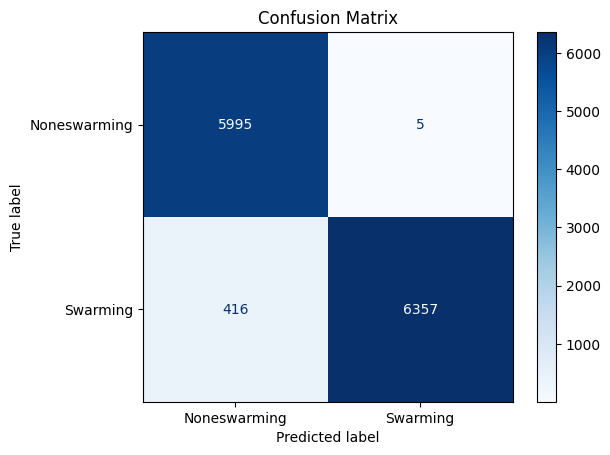

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model2.predict(test_data_buzz_1)
rounded_predictions = np.round(predictions)

# Calculate confusion matrix
cm = confusion_matrix(test_labels_buzz_1, rounded_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Noneswarming", "Swarming"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(train_data_buzz_1, train_labels_buzz_1)
val_predictions = rf_classifier.predict(val_data_buzz_1)

# Calculate the accuracy on the validation set
val_accuracy_rf = accuracy_score(val_labels_buzz_1, val_predictions)
print("Validation Accuracy:", val_accuracy_rf)
# Predictions on the test set
rf_predictions = rf_classifier.predict(test_data_buzz_1)
test_accuracy_rf = accuracy_score(test_labels_buzz_1, rf_predictions)
print(f'Random Forest Accuracy: {test_accuracy_rf}')

# Display confusion matrix and classification report
print(confusion_matrix(test_labels_buzz_1, rf_predictions))
print(classification_report(test_labels_buzz_1, rf_predictions))


Validation Accuracy: 1.0
Random Forest Accuracy: 0.9825412980505754
[[5974   26]
 [ 197 6576]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6000
           1       1.00      0.97      0.98      6773

    accuracy                           0.98     12773
   macro avg       0.98      0.98      0.98     12773
weighted avg       0.98      0.98      0.98     12773



# KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model
knn_classifier.fit(train_data_buzz_1, train_labels_buzz_1)

# Predictions on the validation set
val_predictions_knn = knn_classifier.predict(val_data_buzz_1)

# Calculate the accuracy on the validation set for KNN
val_accuracy_knn = accuracy_score(val_labels_buzz_1, val_predictions_knn)
print("Validation Accuracy (KNN):", val_accuracy_knn)

# Predictions on the test set for KNN
knn_predictions = knn_classifier.predict(test_data_buzz_1)
test_accuracy_knn = accuracy_score(test_labels_buzz_1, knn_predictions)
print(f'KNN Accuracy: {test_accuracy_knn}')

# Display confusion matrix and classification report for KNN
print(confusion_matrix(test_labels_buzz_1, knn_predictions))
print(classification_report(test_labels_buzz_1, knn_predictions))

Validation Accuracy (KNN): 0.5844708385038114
KNN Accuracy: 0.4082830971580678
[[3521 2479]
 [5079 1694]]
              precision    recall  f1-score   support

           0       0.41      0.59      0.48      6000
           1       0.41      0.25      0.31      6773

    accuracy                           0.41     12773
   macro avg       0.41      0.42      0.40     12773
weighted avg       0.41      0.41      0.39     12773



# SVM

In [19]:
from sklearn.svm import SVC
# Create an SVM Classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Fit the SVM model
svm_classifier.fit(train_data_buzz_1, train_labels_buzz_1)

# Predictions on the validation set for SVM
val_predictions_svm = svm_classifier.predict(val_data_buzz_1)

# Calculate the accuracy on the validation set for SVM
val_accuracy_svm = accuracy_score(val_labels_buzz_1, val_predictions_svm)
print("Validation Accuracy (SVM):", val_accuracy_svm)

# Predictions on the test set for SVM
svm_predictions = svm_classifier.predict(test_data_buzz_1)
test_accuracy_svm = accuracy_score(test_labels_buzz_1, svm_predictions)
print(f'SVM Accuracy: {test_accuracy_svm}')

# Display confusion matrix and classification report for SVM
print(confusion_matrix(test_labels_buzz_1, svm_predictions))
print(classification_report(test_labels_buzz_1, svm_predictions))


Validation Accuracy (SVM): 0.8725403297287715
SVM Accuracy: 0.8010647459484851
[[3583 2417]
 [ 124 6649]]
              precision    recall  f1-score   support

           0       0.97      0.60      0.74      6000
           1       0.73      0.98      0.84      6773

    accuracy                           0.80     12773
   macro avg       0.85      0.79      0.79     12773
weighted avg       0.84      0.80      0.79     12773



In [20]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression Classifier
logreg_classifier = LogisticRegression()

# Fit the Logistic Regression model
logreg_classifier.fit(train_data_buzz_1, train_labels_buzz_1)

# Predictions on the validation set for Logistic Regression
val_predictions_logreg = logreg_classifier.predict(val_data_buzz_1)

# Calculate the accuracy on the validation set for Logistic Regression
val_accuracy_logreg = accuracy_score(val_labels_buzz_1, val_predictions_logreg)
print("Validation Accuracy (Logistic Regression):", val_accuracy_logreg)

# Predictions on the test set for Logistic Regression
logreg_predictions = logreg_classifier.predict(test_data_buzz_1)
test_accuracy_logreg = accuracy_score(test_labels_buzz_1, logreg_predictions)
print(f'Logistic Regression Accuracy: {test_accuracy_logreg}')

# Display confusion matrix and classification report for Logistic Regression
print(confusion_matrix(test_labels_buzz_1, logreg_predictions))
print(classification_report(test_labels_buzz_1, logreg_predictions))


Validation Accuracy (Logistic Regression): 1.0
Logistic Regression Accuracy: 0.9716589681359117
[[5833  167]
 [ 195 6578]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6000
           1       0.98      0.97      0.97      6773

    accuracy                           0.97     12773
   macro avg       0.97      0.97      0.97     12773
weighted avg       0.97      0.97      0.97     12773



c:\Users\hoang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Buzz 2

#### load data

In [1]:
import numpy as np

# Load training data
Noneswarming_train_mfccs_buzz_2 = np.load("Train_buzz_2_mfccs/Noneswarming_train.npy")
Swarming_train_mfccs_buzz_2 = np.load("Train_buzz_2_mfccs/Swarming_train.npy")

# Load test data
Noneswarming_test_mfccs_buzz_2 = np.load("Test_buzz_2_mfccs/Noneswarming_test.npy")
Swarming_test_mfccs_buzz_2 = np.load("Test_buzz_2_mfccs/Swarming_test.npy")

# Load validation data
Noneswarming_val_mfccs_buzz_2 = np.load("Val_buzz_2_mfccs/Noneswarming_val.npy")
Swarming_val_mfccs_buzz_2 = np.load("Val_buzz_2_mfccs/Swarming_val.npy")


In [2]:
# For _buzz_2
train_data_buzz_2 = np.vstack([Noneswarming_train_mfccs_buzz_2, Swarming_train_mfccs_buzz_2])
train_labels_buzz_2 = np.array([0] * Noneswarming_train_mfccs_buzz_2.shape[0] + [1] * Swarming_train_mfccs_buzz_2.shape[0])

val_data_buzz_2 = np.vstack([Noneswarming_val_mfccs_buzz_2, Swarming_val_mfccs_buzz_2])
val_labels_buzz_2 = np.array([0] * Noneswarming_val_mfccs_buzz_2.shape[0] + [1] * Swarming_val_mfccs_buzz_2.shape[0])

test_data_buzz_2 = np.vstack([Noneswarming_test_mfccs_buzz_2, Swarming_test_mfccs_buzz_2])
test_labels_buzz_2 = np.array([0] * Noneswarming_test_mfccs_buzz_2.shape[0] + [1] * Swarming_test_mfccs_buzz_2.shape[0])


In [3]:
print("Train Data Shape:", train_data_buzz_2.shape)
print("Train Labels Shape:", train_labels_buzz_2.shape)

print("Validation Data Shape:", val_data_buzz_2.shape)
print("Validation Labels Shape:", val_labels_buzz_2.shape)

print("Test Data Shape:", test_data_buzz_2.shape)
print("Test Labels Shape:", test_labels_buzz_2.shape)


Train Data Shape: (24732, 80)
Train Labels Shape: (24732,)
Validation Data Shape: (4249, 80)
Validation Labels Shape: (4249,)
Test Data Shape: (11575, 80)
Test Labels Shape: (11575,)


# 1DCNN

In [29]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

model3 = keras.Sequential([
    keras.layers.Conv1D(64, 3, activation='relu', input_shape=(80, 1)),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(128, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(256, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model3.fit(train_data_buzz_2 ,train_labels_buzz_2, epochs=10, batch_size=32, validation_data=(val_data_buzz_2,val_labels_buzz_2))

Epoch 1/10
773/773 [==============================] - 14s 16ms/step - loss: 0.0077 - accuracy: 0.9966 - val_loss: 2.4160e-04 - val_accuracy: 1.0000
Epoch 2/10
773/773 [==============================] - 12s 16ms/step - loss: 0.0139 - accuracy: 0.9986 - val_loss: 2.1112e-09 - val_accuracy: 1.0000
Epoch 3/10
773/773 [==============================] - 12s 16ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 4.6663e-06 - val_accuracy: 1.0000
Epoch 4/10
773/773 [==============================] - 12s 16ms/step - loss: 3.6553e-04 - accuracy: 1.0000 - val_loss: 7.4471e-05 - val_accuracy: 1.0000
Epoch 5/10
773/773 [==============================] - 11s 14ms/step - loss: 8.3933e-06 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 0.9995
Epoch 6/10
773/773 [==============================] - 11s 14ms/step - loss: 1.4118e-06 - accuracy: 1.0000 - val_loss: 3.1475e-05 - val_accuracy: 1.0000
Epoch 7/10
773/773 [==============================] - 12s 15ms/step - loss: 2.7525e-07 - accuracy: 1.000

In [30]:
# Evaluate the model on the test set
test_loss, test_acc = model3.evaluate(test_data_buzz_2 , test_labels_buzz_2)

print(f'Test accuracy: {test_acc}')

362/362 [==============================] - 1s 3ms/step - loss: 0.2094 - accuracy: 0.9787
Test accuracy: 0.9787473082542419


362/362 [==============================] - 1s 3ms/step


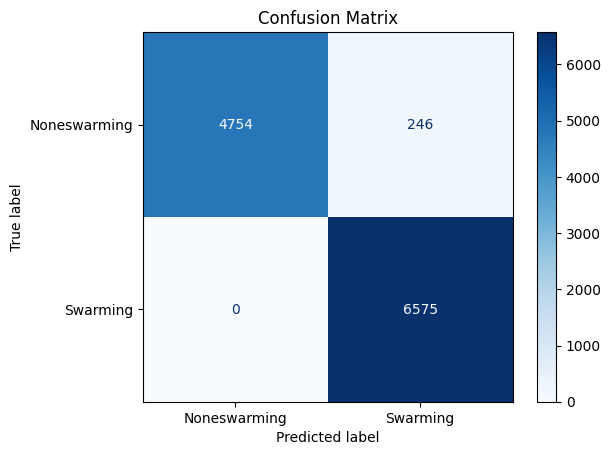

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model3.predict(test_data_buzz_2)
rounded_predictions = np.round(predictions)

# Calculate confusion matrix
cm = confusion_matrix(test_labels_buzz_2, rounded_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Noneswarming", "Swarming"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# RNN/LSTM

In [32]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

model4 = keras.Sequential([
    keras.layers.LSTM(64, return_sequences=True, input_shape=(80, 1)),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(256),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model4.fit(train_data_buzz_2 ,train_labels_buzz_2, epochs=10, batch_size=32, validation_data=(val_data_buzz_2,val_labels_buzz_2))
model4.summary()

Epoch 1/10
773/773 [==============================] - 148s 180ms/step - loss: 0.1079 - accuracy: 0.9414 - val_loss: 0.0122 - val_accuracy: 0.9988
Epoch 2/10
773/773 [==============================] - 134s 173ms/step - loss: 0.0089 - accuracy: 0.9981 - val_loss: 0.0163 - val_accuracy: 0.9984
Epoch 3/10
773/773 [==============================] - 136s 176ms/step - loss: 0.0177 - accuracy: 0.9962 - val_loss: 0.0719 - val_accuracy: 0.9732
Epoch 4/10
773/773 [==============================] - 136s 176ms/step - loss: 0.0082 - accuracy: 0.9989 - val_loss: 0.2072 - val_accuracy: 0.9306
Epoch 5/10
773/773 [==============================] - 145s 188ms/step - loss: 0.0108 - accuracy: 0.9977 - val_loss: 0.1158 - val_accuracy: 0.9706
Epoch 6/10
773/773 [==============================] - 152s 197ms/step - loss: 0.0135 - accuracy: 0.9963 - val_loss: 0.3374 - val_accuracy: 0.9167
Epoch 7/10
773/773 [==============================] - 150s 194ms/step - loss: 0.0100 - accuracy: 0.9984 - val_loss: 0.1983 -

In [35]:
# Evaluate the model on the test set
test_loss, test_acc = model4.evaluate(test_data_buzz_2 , test_labels_buzz_2)

print(f'Test accuracy: {test_acc}')

362/362 [==============================] - 45s 123ms/step - loss: 0.2068 - accuracy: 0.9799
Test accuracy: 0.9798704385757446


362/362 [==============================] - 106s 251ms/step


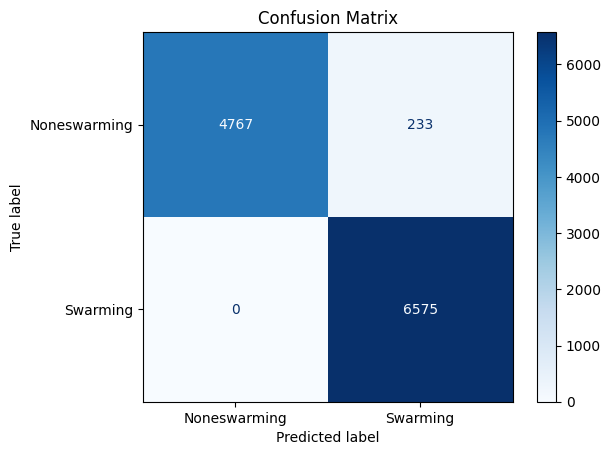

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model4.predict(test_data_buzz_2)
rounded_predictions = np.round(predictions)

# Calculate confusion matrix
cm = confusion_matrix(test_labels_buzz_2, rounded_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Noneswarming", "Swarming"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Random Forest Classifier
rf_classifier_2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier_2.fit(train_data_buzz_2, train_labels_buzz_2)
val_predictions_2 = rf_classifier_2.predict(val_data_buzz_2)

# Calculate the accuracy on the validation set
val_accuracy_rf_2 = accuracy_score(val_labels_buzz_2, val_predictions_2)
print("Validation Accuracy:", val_accuracy_rf_2)
# Predictions on the test set
rf_predictions_2 = rf_classifier_2.predict(test_data_buzz_2)
test_accuracy_rf_2 = accuracy_score(test_labels_buzz_2, rf_predictions_2)
print(f'Random Forest Accuracy: {test_accuracy_rf_2}')

# Display confusion matrix and classification report
print(confusion_matrix(test_labels_buzz_2, rf_predictions_2))
print(classification_report(test_labels_buzz_2, rf_predictions_2))


Validation Accuracy: 1.0
Random Forest Accuracy: 0.9919654427645789
[[4907   93]
 [   0 6575]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5000
           1       0.99      1.00      0.99      6575

    accuracy                           0.99     11575
   macro avg       0.99      0.99      0.99     11575
weighted avg       0.99      0.99      0.99     11575



# KNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN Classifier
knn_classifier_2 = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model
knn_classifier_2.fit(train_data_buzz_2, train_labels_buzz_2)

# Predictions on the validation set
val_predictions_knn_2 = knn_classifier_2.predict(val_data_buzz_2)

# Calculate the accuracy on the validation set for KNN
val_accuracy_knn_2 = accuracy_score(val_labels_buzz_2, val_predictions_knn_2)
print("Validation Accuracy (KNN):", val_accuracy_knn_2)

# Predictions on the test set for KNN
knn_predictions_2 = knn_classifier_2.predict(test_data_buzz_2)
test_accuracy_knn_2 = accuracy_score(test_labels_buzz_2, knn_predictions_2)
print(f'KNN Accuracy: {test_accuracy_knn_2}')

# Display confusion matrix and classification report for KNN
print(confusion_matrix(test_labels_buzz_2, knn_predictions_2))
print(classification_report(test_labels_buzz_2, knn_predictions_2))

Validation Accuracy (KNN): 0.9995293010120028
KNN Accuracy: 0.9766738660907127
[[4730  270]
 [   0 6575]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      5000
           1       0.96      1.00      0.98      6575

    accuracy                           0.98     11575
   macro avg       0.98      0.97      0.98     11575
weighted avg       0.98      0.98      0.98     11575



# SVM

In [6]:
from sklearn.svm import SVC
# Create an SVM Classifier
svm_classifier_2 = SVC(kernel='linear', C=1.0)

# Fit the SVM model
svm_classifier_2.fit(train_data_buzz_2, train_labels_buzz_2)

# Predictions on the validation set for SVM
val_predictions_svm_2 = svm_classifier_2.predict(val_data_buzz_2)

# Calculate the accuracy on the validation set for SVM
val_accuracy_svm_2 = accuracy_score(val_labels_buzz_2, val_predictions_svm_2)
print("Validation Accuracy (SVM):", val_accuracy_svm_2)

# Predictions on the test set for SVM
svm_predictions_2 = svm_classifier_2.predict(test_data_buzz_2)
test_accuracy_svm_2 = accuracy_score(test_labels_buzz_2, svm_predictions_2)
print(f'SVM Accuracy: {test_accuracy_svm_2}')

# Display confusion matrix and classification report for SVM
print(confusion_matrix(test_labels_buzz_2, svm_predictions_2))
print(classification_report(test_labels_buzz_2, svm_predictions_2))

Validation Accuracy (SVM): 0.9978818545540127
SVM Accuracy: 0.8412958963282937
[[3163 1837]
 [   0 6575]]
              precision    recall  f1-score   support

           0       1.00      0.63      0.77      5000
           1       0.78      1.00      0.88      6575

    accuracy                           0.84     11575
   macro avg       0.89      0.82      0.83     11575
weighted avg       0.88      0.84      0.83     11575



# Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression Classifier
logreg_classifier_2 = LogisticRegression()

# Fit the Logistic Regression model
logreg_classifier_2.fit(train_data_buzz_2, train_labels_buzz_2)

# Predictions on the validation set for Logistic Regression
val_predictions_logreg_2 = logreg_classifier_2.predict(val_data_buzz_2)

# Calculate the accuracy on the validation set for Logistic Regression
val_accuracy_logreg_2 = accuracy_score(val_labels_buzz_2, val_predictions_logreg_2)
print("Validation Accuracy (Logistic Regression):", val_accuracy_logreg_2)

# Predictions on the test set for Logistic Regression
logreg_predictions_2 = logreg_classifier_2.predict(test_data_buzz_2)
test_accuracy_logreg_2 = accuracy_score(test_labels_buzz_2, logreg_predictions_2)
print(f'Logistic Regression Accuracy: {test_accuracy_logreg_2}')

# Display confusion matrix and classification report for Logistic Regression
print(confusion_matrix(test_labels_buzz_2, logreg_predictions_2))
print(classification_report(test_labels_buzz_2, logreg_predictions_2))

Validation Accuracy (Logistic Regression): 0.9997646505060014
Logistic Regression Accuracy: 0.9647516198704104
[[4592  408]
 [   0 6575]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      5000
           1       0.94      1.00      0.97      6575

    accuracy                           0.96     11575
   macro avg       0.97      0.96      0.96     11575
weighted avg       0.97      0.96      0.96     11575



c:\Users\hoang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
